In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Importing and cleaning the dataset**
###Below is the import of the dataset

In [92]:
fashion_sales = pd.read_csv('/content/drive/MyDrive/FashionDataset.csv')
fashion_sales.head(5)

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


###Checking the number of columns and rows. There are 8 columns and 30758 rows

In [93]:
fashion_sales.shape

(30758, 8)

In [94]:
fashion_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


###Formatting columns' names and dropping the "Unnamed: 0" column

In [95]:
# Dropping unnamed column
fashion_sales = fashion_sales.drop("Unnamed: 0", axis=1)

# Renaming the columns
fashion_sales = fashion_sales.rename(columns={"BrandName": "brand", "Deatils": "details", "Sizes": "sizes", "MRP": "full_price", "SellPrice": "sale_price", "Discount": "discount", "Category": "category"})


In [96]:
fashion_sales.head()

,brand,details,sizes,full_price,sale_price,discount,category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


###Removing unnecessary text from full_price, discount, sizes and category columns

In [97]:
# Removing Rs\n from full_price column below:
to_remove = "Rs\n"
fashion_sales["full_price"] = fashion_sales["full_price"].str.replace(to_remove, "", regex=False)

# Removing "% off" from discount below:
to_remove = "% off"
fashion_sales["discount"] = fashion_sales["discount"].str.replace(to_remove, "", regex=False)

# Removing "Size:" from sizes column below:
to_remove = "Size:"
fashion_sales["sizes"] = fashion_sales["sizes"].str.replace(to_remove, "", regex=False)

# Removing "-Women" from category column below:
to_remove = "-Women"
fashion_sales["category"] = fashion_sales["category"].str.replace(to_remove, "", regex=False)

In [98]:
fashion_sales.head()

,brand,details,sizes,full_price,sale_price,discount,category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear


###Changing the data types from string to float for full_price, sale_price and string to integer for discount

In [99]:
fashion_sales[["full_price", "sale_price"]] = fashion_sales[["full_price", "sale_price"]].astype(float)

fashion_sales["discount"] = fashion_sales["discount"].replace("Nan", np.nan)
fashion_sales["discount"] = fashion_sales["discount"].fillna("0")
fashion_sales["discount"] = fashion_sales["discount"].astype(int)

###For better understanding, we exchange Indian Rupee to Pound sterling (exchange rate is 0.0094)

In [100]:
fashion_sales["full_price"] = fashion_sales["full_price"]*0.0094
fashion_sales["sale_price"] = fashion_sales["sale_price"]*0.0094

###Handling the Nan values

In [101]:
# Checking for Nan values
nan_summary = fashion_sales.isna().sum()
nan_summary

brand            0
details          0
sizes            0
full_price    8208
sale_price    1183
discount         0
category         0
dtype: int64

In [102]:
# Frome the code below we can see that there are some rows with both full_price and sale_price Nan
rows_with_nan_full_price = fashion_sales[fashion_sales['full_price'].isna()]
rows_with_nan_full_price

# Dropping rows where both columns have Nan
fashion_sales = fashion_sales.dropna(subset=["full_price", "sale_price"], how='all')

# Checking how dataset with full_price equals Nan looks. It seems like we can put sale_price value to full_price value, because the discount is )
rows_with_nan_full_price = fashion_sales[fashion_sales['full_price'].isna()]
rows_with_nan_full_price

fashion_sales['full_price'].fillna(fashion_sales['sale_price'], inplace=True)

# Checking if there is any Nan values
nan_summary = fashion_sales.isna().sum()
nan_summary

<ipython-input-102-020e9cdd7013>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fashion_sales['full_price'].fillna(fashion_sales['sale_price'], inplace=True)


brand         0
details       0
sizes         0
full_price    0
sale_price    0
discount      0
category      0
dtype: int64

##**Analysis and visualisation.**

In [103]:
# Using .describe to see count, mean, std, min, max, 25%, 50% and 75% for each category
summary_stats = fashion_sales.groupby("category")["sale_price"].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Footwear,2475.0,20.623885,15.362494,2.3406,9.3906,15.7544,26.7618,103.3906
Fragrance,475.0,37.337433,25.640664,1.8330,12.7370,37.3650,55.9300,186.1200
Indianwear,9975.0,13.950662,9.403492,1.1750,7.3273,12.2106,18.7765,127.8306
Jewellery,1725.0,20.338854,27.796139,0.8366,3.7412,9.3718,24.4212,291.4000
Lingerie&Nightwear,3225.0,8.627725,6.256456,1.0716,4.2206,6.7586,11.2424,35.7106
Watches,1725.0,81.378508,85.300029,8.4318,33.7930,59.6806,103.3530,1339.5000
Westernwear,9975.0,12.387842,7.913899,0.6956,7.0406,10.3400,15.7826,78.9600


In [104]:
# Using describe to see count, mean, std, min, max, 25%, 50% and 75% for each brand
summary_stats = fashion_sales.groupby("brand")["sale_price"].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
109f,114.0,9.640442,5.183765,3.7506,5.6306,7.3226,14.0906,24.4306
18.21 man made,1.0,51.700000,NaN,51.7000,51.7000,51.7000,51.7000,51.7000
4711,1.0,29.328000,NaN,29.3280,29.3280,29.3280,29.3280,29.3280
aarke,45.0,29.273689,11.541565,10.7160,21.6200,27.2600,33.8400,55.4600
abercrombie & fitch,5.0,41.623200,6.883342,37.5060,37.5060,38.0700,41.4540,53.5800
...,...,...,...,...,...,...,...,...
zingg,5.0,1.870600,0.664680,0.9306,1.8706,1.8706,1.8706,2.8106
zink london,918.0,9.872580,3.807034,3.7506,7.1346,9.3906,12.3516,22.5506
zink z,35.0,15.755743,5.385845,7.5106,12.2106,15.0306,18.7906,26.3106


###Bar plot of total sales by category

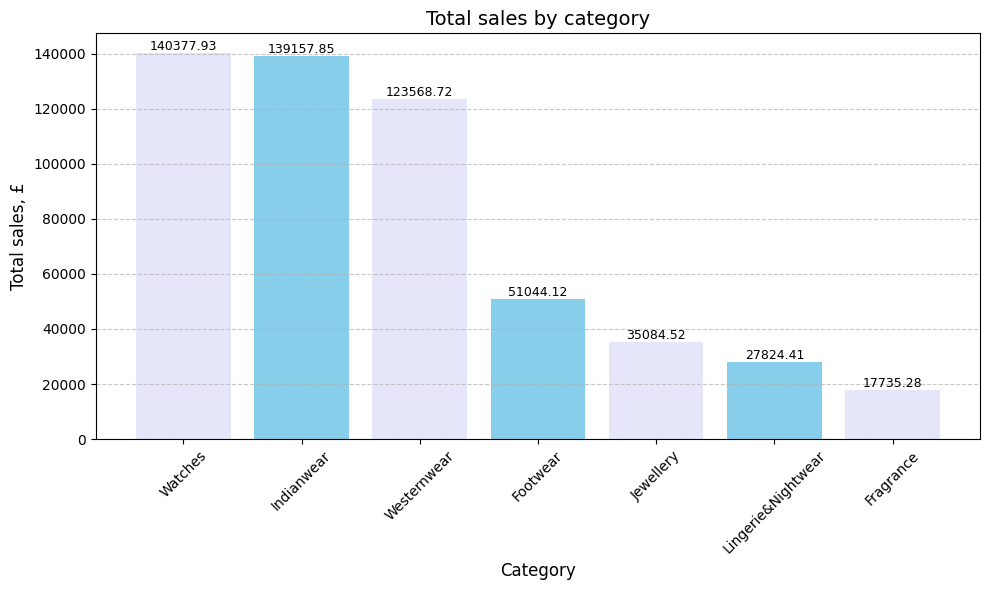

In [105]:
# Calculating total sales per category
total_sales = fashion_sales.groupby("category")["sale_price"].sum().reset_index()

# Sorting by total sales in descending order
total_sales_sorted = total_sales.sort_values(by="sale_price", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(total_sales_sorted["category"], total_sales_sorted["sale_price"], color=["lavender", "skyblue"])
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total sales, £", fontsize=12)
plt.title("Total sales by category", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha="center", va="bottom", fontsize=9)

plt.show()

###Pie plot of totals sales by category

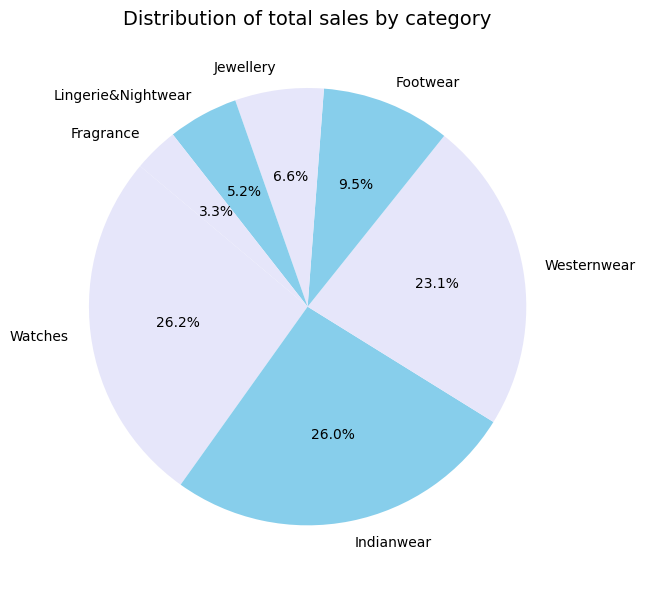

In [106]:
# Calculating total sales per category
total_sales = fashion_sales.groupby("category")["sale_price"].sum().reset_index()

# Sorting by total sales in descending order
total_sales_sorted = total_sales.sort_values(by="sale_price", ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
colors = ["lavender", "skyblue"]
plt.pie(total_sales_sorted["sale_price"], labels=total_sales_sorted["category"], colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of total sales by category", fontsize=14)
plt.tight_layout()
plt.show()

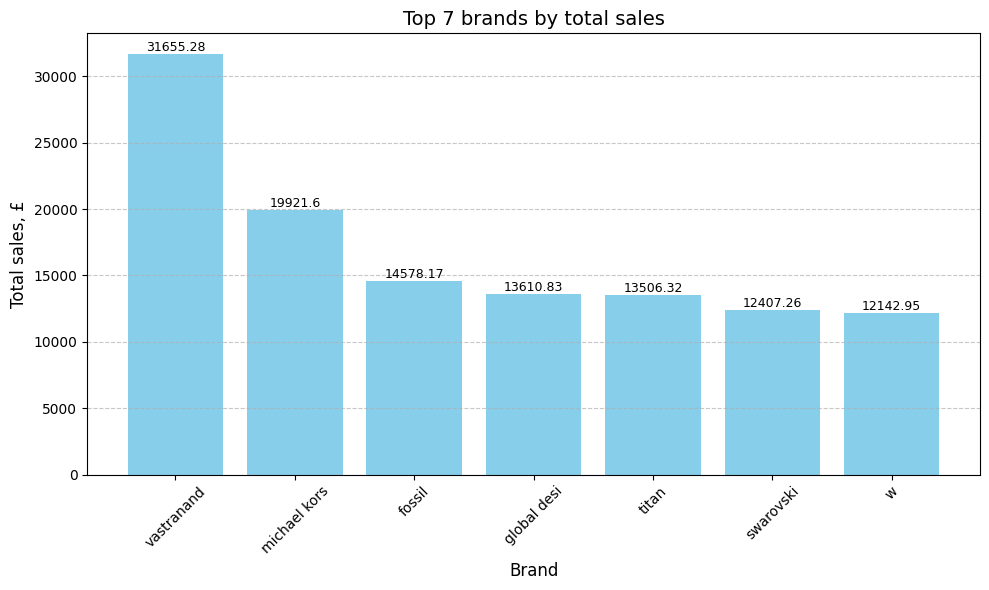

In [107]:
# Calculate total sales per brand
total_sales_brand = fashion_sales.groupby("brand")["sale_price"].sum().reset_index()

# Sort by total sales in descending order and select top 7 brands
top_brands = total_sales_brand.sort_values(by="sale_price", ascending=False).head(7)

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(top_brands["brand"], top_brands["sale_price"], color="skyblue")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Total sales, £", fontsize=12)
plt.title("Top 7 brands by total sales", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()